0.5163159095802055
0.5725910207035052
TestRMSE    :  2656.6985648349787
TrainRMSE   :  2812.613425558408


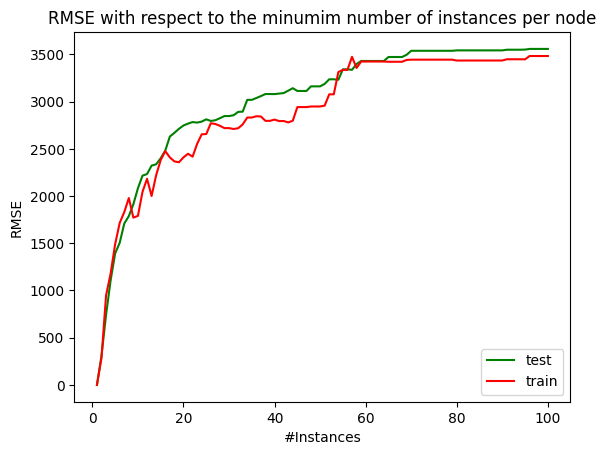

In [1]:
#Yes we gonna check a diabetes cuz why not

from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dummy=load_diabetes(scaled=True)
data=dummy.data
target=dummy.target
df=pd.DataFrame(np.concatenate((data,target.reshape(-1,1)), axis=1), columns=dummy.feature_names+["Tension"])
data=df.iloc[:,:-1]
target=df.iloc[:,-1]
#train test split
train_data, test_data, train_target, test_target = train_test_split(data, target, train_size= 0.8, random_state=4212)

#model of thedecisiontree
'''
for criteria in ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']:
    model=DecisionTreeRegressor(random_state=3124234, criterion=criteria, min_samples_leaf=25)
    model.fit(train_data, train_target)
    print(model.score(test_data, test_target))
'''
model=DecisionTreeRegressor(random_state=3124234, criterion="friedman_mse", min_samples_leaf=25)
model.fit(train_data, train_target)
print(model.score(test_data, test_target))

#YK FUCK THIS   (Combined for enhance score)
model.fit(data, target)
print(model.score(test_data, test_target))

predictedtest=model.predict(test_data)
predictedtrain=model.predict(train_data)

print(f'TestRMSE    :  {mean_squared_error(test_target, predictedtest)}')
print(f'TrainRMSE   :  {mean_squared_error(train_target, predictedtrain)}')

#These are for the visualization
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO
from IPython.display import Image  

dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=df.columns[:-1],  rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DecisionTreeDiabetes.png')
Image(graph.create_png()) 

#visualizing RMSE with minimum number of instances per node
fig, ax= plt.subplots()
RMSE_train=[]
RMSE_test=[]
for i in range(1,101):
    model=DecisionTreeRegressor(criterion="friedman_mse", min_samples_leaf=i)
    model.fit(data, target)
    predictedtest=model.predict(test_data)
    predictedtrain=model.predict(train_data)
    RMSE_train.append(mean_squared_error(test_target, predictedtest))
    RMSE_test.append(mean_squared_error(train_target, predictedtrain))
ax.plot(np.arange(1,101), RMSE_test, c="green", label="test")
ax.plot(np.arange(1,101), RMSE_train, c="red", label="train")
ax.set_title('RMSE with respect to the minumim number of instances per node')
ax.set_xlabel('#Instances')
ax.set_ylabel('RMSE')
ax.legend(loc=("lower right"))